In [3]:
#uploading the baisc libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
suv=pd.read_csv("suv_data.csv")

In [5]:
suv # the data hase 5 columns with unique Usser ID

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
suv.drop("User ID",axis=1,inplace= True) # removing the unique user ID

In [7]:
suv.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
# convert estimated salary to value of thousands $

suv["EstimatedSalary"]= suv["EstimatedSalary"].apply(lambda x: x/1000)

In [9]:
suv.info() # no null values,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    object 
 1   Age              400 non-null    int64  
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB


In [63]:
suv

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19.0,0
1,Male,35,20.0,0
2,Female,26,43.0,0
3,Female,27,57.0,0
4,Male,19,76.0,0
...,...,...,...,...
395,Female,46,41.0,1
396,Male,51,23.0,1
397,Female,50,20.0,1
398,Male,36,33.0,0


In [64]:
suv.describe(include="all",percentiles=[0.25,0.5,0.75,0.99])

,Gender,Age,EstimatedSalary,Purchased
count,400,400.000000,400.00000,400.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,204,NaN,NaN,NaN
mean,NaN,37.655000,69.74250,0.357500
std,NaN,10.482877,34.09696,0.479864
min,NaN,18.000000,15.00000,0.000000
25%,NaN,29.750000,43.00000,0.000000
50%,NaN,37.000000,70.00000,0.000000
75%,NaN,46.000000,88.00000,1.000000


# Observations
- the data is almost 50% male, 50 % female. so the train/test split must follow the same pattern.
- since 99%ile  and max values are almost same, there may be no outliers.


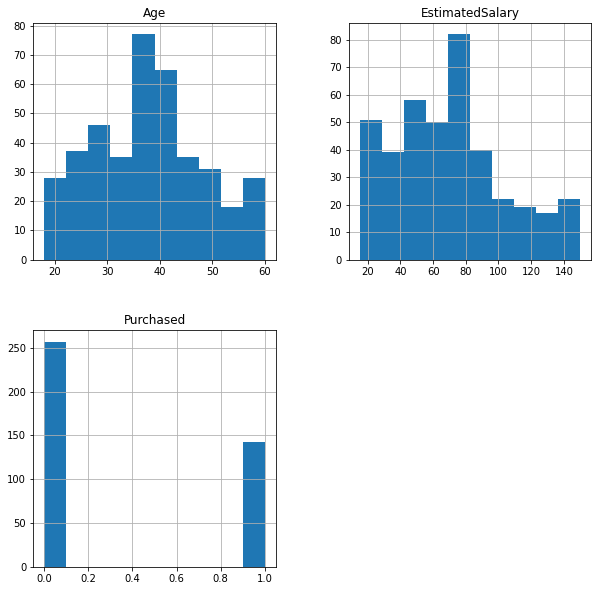

In [65]:
suv.hist(bins=10,figsize=(10,10))
plt.show()

### Observation form histogram
- most people did not buy suv
- most people are in the age of 35-45
- most people have 65,000 to 80,000 dollars salary
- the data set is not balanced


In [10]:
# creating a category column for salary to see the income distribution 
suv["Salary_cat"] = pd.cut(suv["EstimatedSalary"],
                               bins=[0., 40, 80, 100, 140., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [11]:
suv

,Gender,Age,EstimatedSalary,Purchased,Salary_cat
0,Male,19,19.0,0,1
1,Male,35,20.0,0,1
2,Female,26,43.0,0,2
3,Female,27,57.0,0,2
4,Male,19,76.0,0,2
...,...,...,...,...,...
395,Female,46,41.0,1,2
396,Male,51,23.0,1,1
397,Female,50,20.0,1,1
398,Male,36,33.0,0,1


<AxesSubplot:>

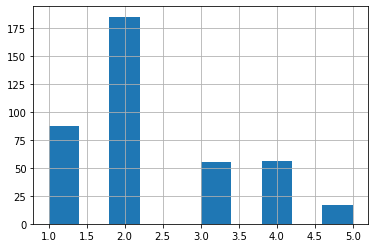

In [12]:
suv.Salary_cat.hist()

# Observations 
- this pattern should be folowed in train test split

In [74]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(suv, suv["Salary_cat"]):
    suv_train =suv.loc[train_index]
    suv_test = suv.loc[test_index]

<AxesSubplot:>

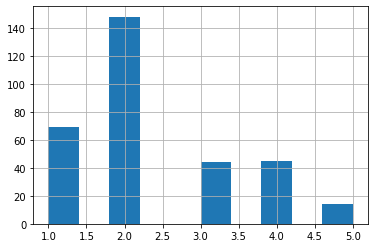

In [80]:
suv_train.Salary_cat.hist()

<AxesSubplot:>

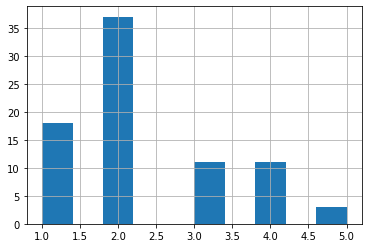

In [79]:
suv_test.Salary_cat.hist()

In [81]:
suv_train

,Gender,Age,EstimatedSalary,Purchased,Salary_cat
335,Female,36,54.0,0,2
372,Female,39,73.0,0,2
369,Female,54,26.0,1,1
320,Female,52,138.0,1,4
192,Male,29,43.0,0,2
...,...,...,...,...,...
26,Male,49,28.0,1,1
11,Female,26,52.0,0,2
32,Female,21,16.0,0,1
386,Female,49,39.0,1,1


In [82]:
suv_train.drop("Salary_cat",axis=1,inplace= True)

In [91]:
suv_train.Gender.value_counts(1)

Female    0.528125
Male      0.471875
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

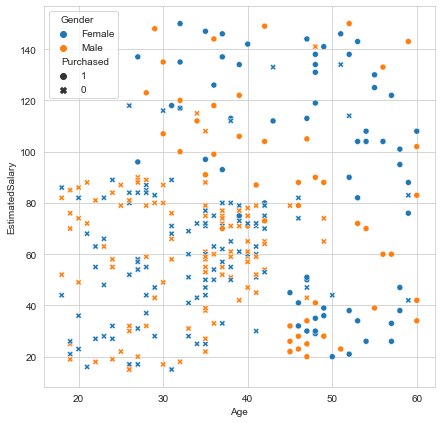

In [106]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 7))
sns.scatterplot(x="Age", y="EstimatedSalary",hue="Gender",data=suv_train,  style="Purchased",style_order=[1,0])

# Observations
- there is a cluster of people who dont buy the suv in the range of 35 to 45 age and belown 80,000 salary
- genral patten is that people below 45 and with salary < 90,000 dont tend to buy suv
- above 45 years age people buy suv even if there salary is low (< 40,000)
- most people with salary > 120,000 buy suv

In [107]:
suv_train

,Gender,Age,EstimatedSalary,Purchased
335,Female,36,54.0,0
372,Female,39,73.0,0
369,Female,54,26.0,1
320,Female,52,138.0,1
192,Male,29,43.0,0
...,...,...,...,...
26,Male,49,28.0,1
11,Female,26,52.0,0
32,Female,21,16.0,0
386,Female,49,39.0,1


<AxesSubplot:>

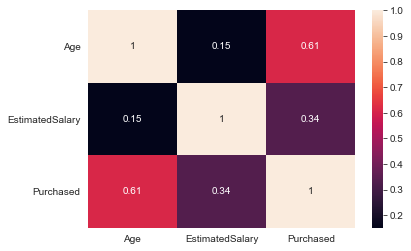

In [112]:
sns.heatmap(suv_train.corr(),annot=True)

# Observations
- there is no linear realtion between age and salary

In [167]:
X_train=suv_train.drop("Purchased",axis=1)
y_train=suv_train["Purchased"]
X_test=suv_train.drop("Purchased",axis=1)
y_test=suv_train["Purchased"]

In [169]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)

In [129]:
X_train

,Age,EstimatedSalary,Gender_Male
335,36,54.0,0
372,39,73.0,0
369,54,26.0,0
320,52,138.0,0
192,29,43.0,1
...,...,...,...
26,49,28.0,1
11,26,52.0,0
32,21,16.0,0
386,49,39.0,0


In [151]:
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
from sklearn.neighbors import KNeighborsClassifier
model2= KNeighborsClassifier()
model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [154]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [145]:
# test the model with train dataset itself

In [155]:
some_data = X_train.iloc[:100]
some_labels = y_train.iloc[:100]


In [171]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [159]:
accuracy_score(some_labels,model1.predict(some_data)) # Logistic regression

0.83

In [157]:
accuracy_score(some_labels,model2.predict(some_data)) #KNN

0.9

In [160]:
accuracy_score(some_labels,model3.predict(some_data)) # RF

1.0

# Is randomforest overfitting?

In [165]:
from sklearn.model_selection import cross_val_score

for i in [model1,model2,model3]:

    print("Accuracy for ", i, "is", cross_val_score(i, X_train, y_train,cv=10,scoring="accuracy").mean())


Accuracy for  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is 0.834375
Accuracy for  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is 0.896875
Accuracy for  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100

# since knn has the maximum cv score we can go with it

In [178]:
y_pred=model2.predict(X_test)

In [184]:
confusion_matrix(y_test, y_pred)

array([[195,  13],
       [ 11, 101]], dtype=int64)

In [189]:
from sklearn.metrics import plot_confusion_matrix

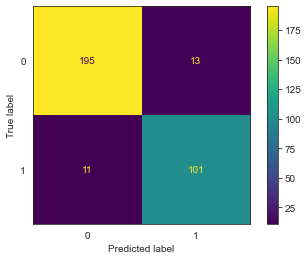

In [194]:
sns.set_style("white")
plot_confusion_matrix(model2,X_test, y_test,values_format= ".0f")